In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [119]:
%matplotlib inline

In [120]:
df = pd.read_csv("cereals.csv", na_values=-1).dropna()
df = df.set_index("name")
df = df.iloc[:, 3:]
df.head()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,
100%_Bran,4,1,130,10.0,5.0,6,280,25,3,1,0.33
100%_Natural_Bran,3,5,15,2.0,8.0,8,135,0,3,1,1.00
All-Bran,4,1,260,9.0,7.0,5,320,25,3,1,0.33
All-Bran_with_Extra_Fiber,4,0,140,14.0,8.0,0,330,25,3,1,0.50
Apple_Cinnamon_Cheerios,2,2,180,1.5,10.5,10,70,25,1,1,0.75


In [121]:
df.describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622
std,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715
min,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000
25%,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000
50%,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [122]:
#Create three clusters.
#Try more to discover what works best.
#Analyze your clusters.
#Fill in missing data (carbo, sugars, potass).
#Consider sorting data by weight or volume.

In [123]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, n_components=2, whiten=False)

In [124]:
reduced_df = pca.transform(df)

In [125]:
#print(pd.DataFrame(reduced_df).head())
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_df)

##Pre-Normalized Data

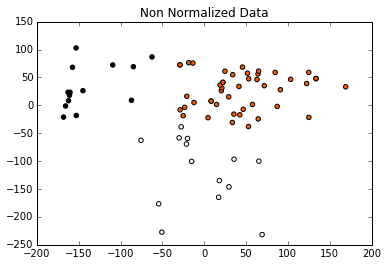

In [126]:
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=y_pred, cmap="hot")
plt.title("Non Normalized Data")
plt.show()

In [127]:
df["weight_by_volume"] = (df["weight"] * df["cups"])
df.head()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,weight_by_volume
name,,,,,,,,,,,,
100%_Bran,4,1,130,10.0,5.0,6,280,25,3,1,0.33,0.33
100%_Natural_Bran,3,5,15,2.0,8.0,8,135,0,3,1,1.00,1.00
All-Bran,4,1,260,9.0,7.0,5,320,25,3,1,0.33,0.33
All-Bran_with_Extra_Fiber,4,0,140,14.0,8.0,0,330,25,3,1,0.50,0.50
Apple_Cinnamon_Cheerios,2,2,180,1.5,10.5,10,70,25,1,1,0.75,0.75


##Normalized by Weight / Volume

In [128]:
cols = df.columns.tolist()
for col in cols:
    df[col] = df[col] / df["weight_by_volume"]

In [129]:
df.head()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,weight_by_volume
name,,,,,,,,,,,,
100%_Bran,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1,1
100%_Natural_Bran,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1,1
All-Bran,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,9.090909,3.030303,1,1
All-Bran_with_Extra_Fiber,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1,1
Apple_Cinnamon_Cheerios,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,1.333333,1.333333,1,1


In [130]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, n_components=2, whiten=False)

In [131]:
reduced_df = pca.transform(df)

In [132]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_df)

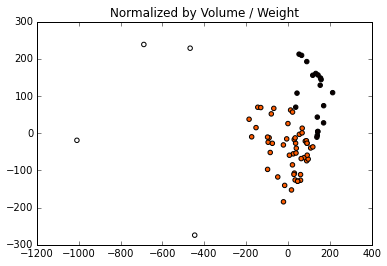

In [133]:
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=y_pred, cmap="hot")
plt.title("Normalized by Volume / Weight")
plt.show()